In [1]:
from deoldify import device
from deoldify.device_id import DeviceId
device.set(device=DeviceId.GPU0)

<DeviceId.GPU0: 0>

In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 215kB 467kB/s eta 0:00:01
     |████████████████████████████████| 2.0MB 416kB/s eta 0:00:01
     |████████████████████████████████| 133kB 572kB/s eta 0:00:01
     |████████████████████████████████| 1.9MB 615kB/s eta 0:00:01
     |████████████████████████████████| 3.9MB 576kB/s eta 0:00:01
     |████████████████████████████████| 81kB 616kB/s eta 0:00:01
     |████████████████████████████████| 122kB 595kB/s eta 0:00:01
     |████████████████████████████████| 163kB 579kB/s eta 0:00:01
     |████████████████████████████████| 133kB 571kB/s eta 0:00:01
     |████████████████████████████████| 1.0MB 576kB/s eta 0:00:01
     |████████████████████████████████| 102kB 686kB/s ta 0:00:01


     |████████████████████████████████| 71kB 724kB/s eta 0:00:01


  Created wheel for ffmpeg: filename=ffmpeg-1.4-cp37-none-any.whl size=6084 sha256=611c1d63c3eebc5a41fffdb48e541b43ca812fc6bcb5cd712ba0ecf0f7af1cdd
  Stored in directory: /Users/adeka/Library/Caches/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
  Created wheel for typing: filename=typing-3.7.4.3-cp37-none-any.whl size=26308 sha256=c40e6255f1584ed2ffc0b362d5a12442f812ca7697b03d12d481350bf5afa78b
  Stored in directory: /Users/adeka/Library/Caches/pip/wheels/2d/04/41/8e1836e79581989c22eebac3f4e70aaac9af07b0908da173be
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-cp37-none-any.whl size=19192 sha256=140a3b62692202ab4d5a8b7fc52c86afb831e738ac09486f010234715e68e6c4
  Stored in directory: /Users/adeka/Library/Caches/pip/wheels/e4/1d/06/640c93f5270d67d0247f30be91f232700d19023f9e66d735c7
  Created wheel for promise: filename=promise-2.3-cp37-none-any.whl size=21494 sha256=1f0da8e9b9b5a8ca6102ac98bbb15a6ad7d796361a48abd5809769608e398015
  Stored in dir

In [4]:
from deoldify.visualize import *
plt.style.use('dark_background')
torch.backends.cudnn.benchmark=True
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

In [6]:
!mkdir 'models'

/bin/sh: wget: command not found


In [11]:
!curl https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O /models/ColorizeArtistic_gen.pth

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  1  243M    1 3039k    0     0  83731      0  0:50:47  0:00:37  0:50:10     0^C


In [16]:
colorizer = get_image_colorizer(artistic=False)

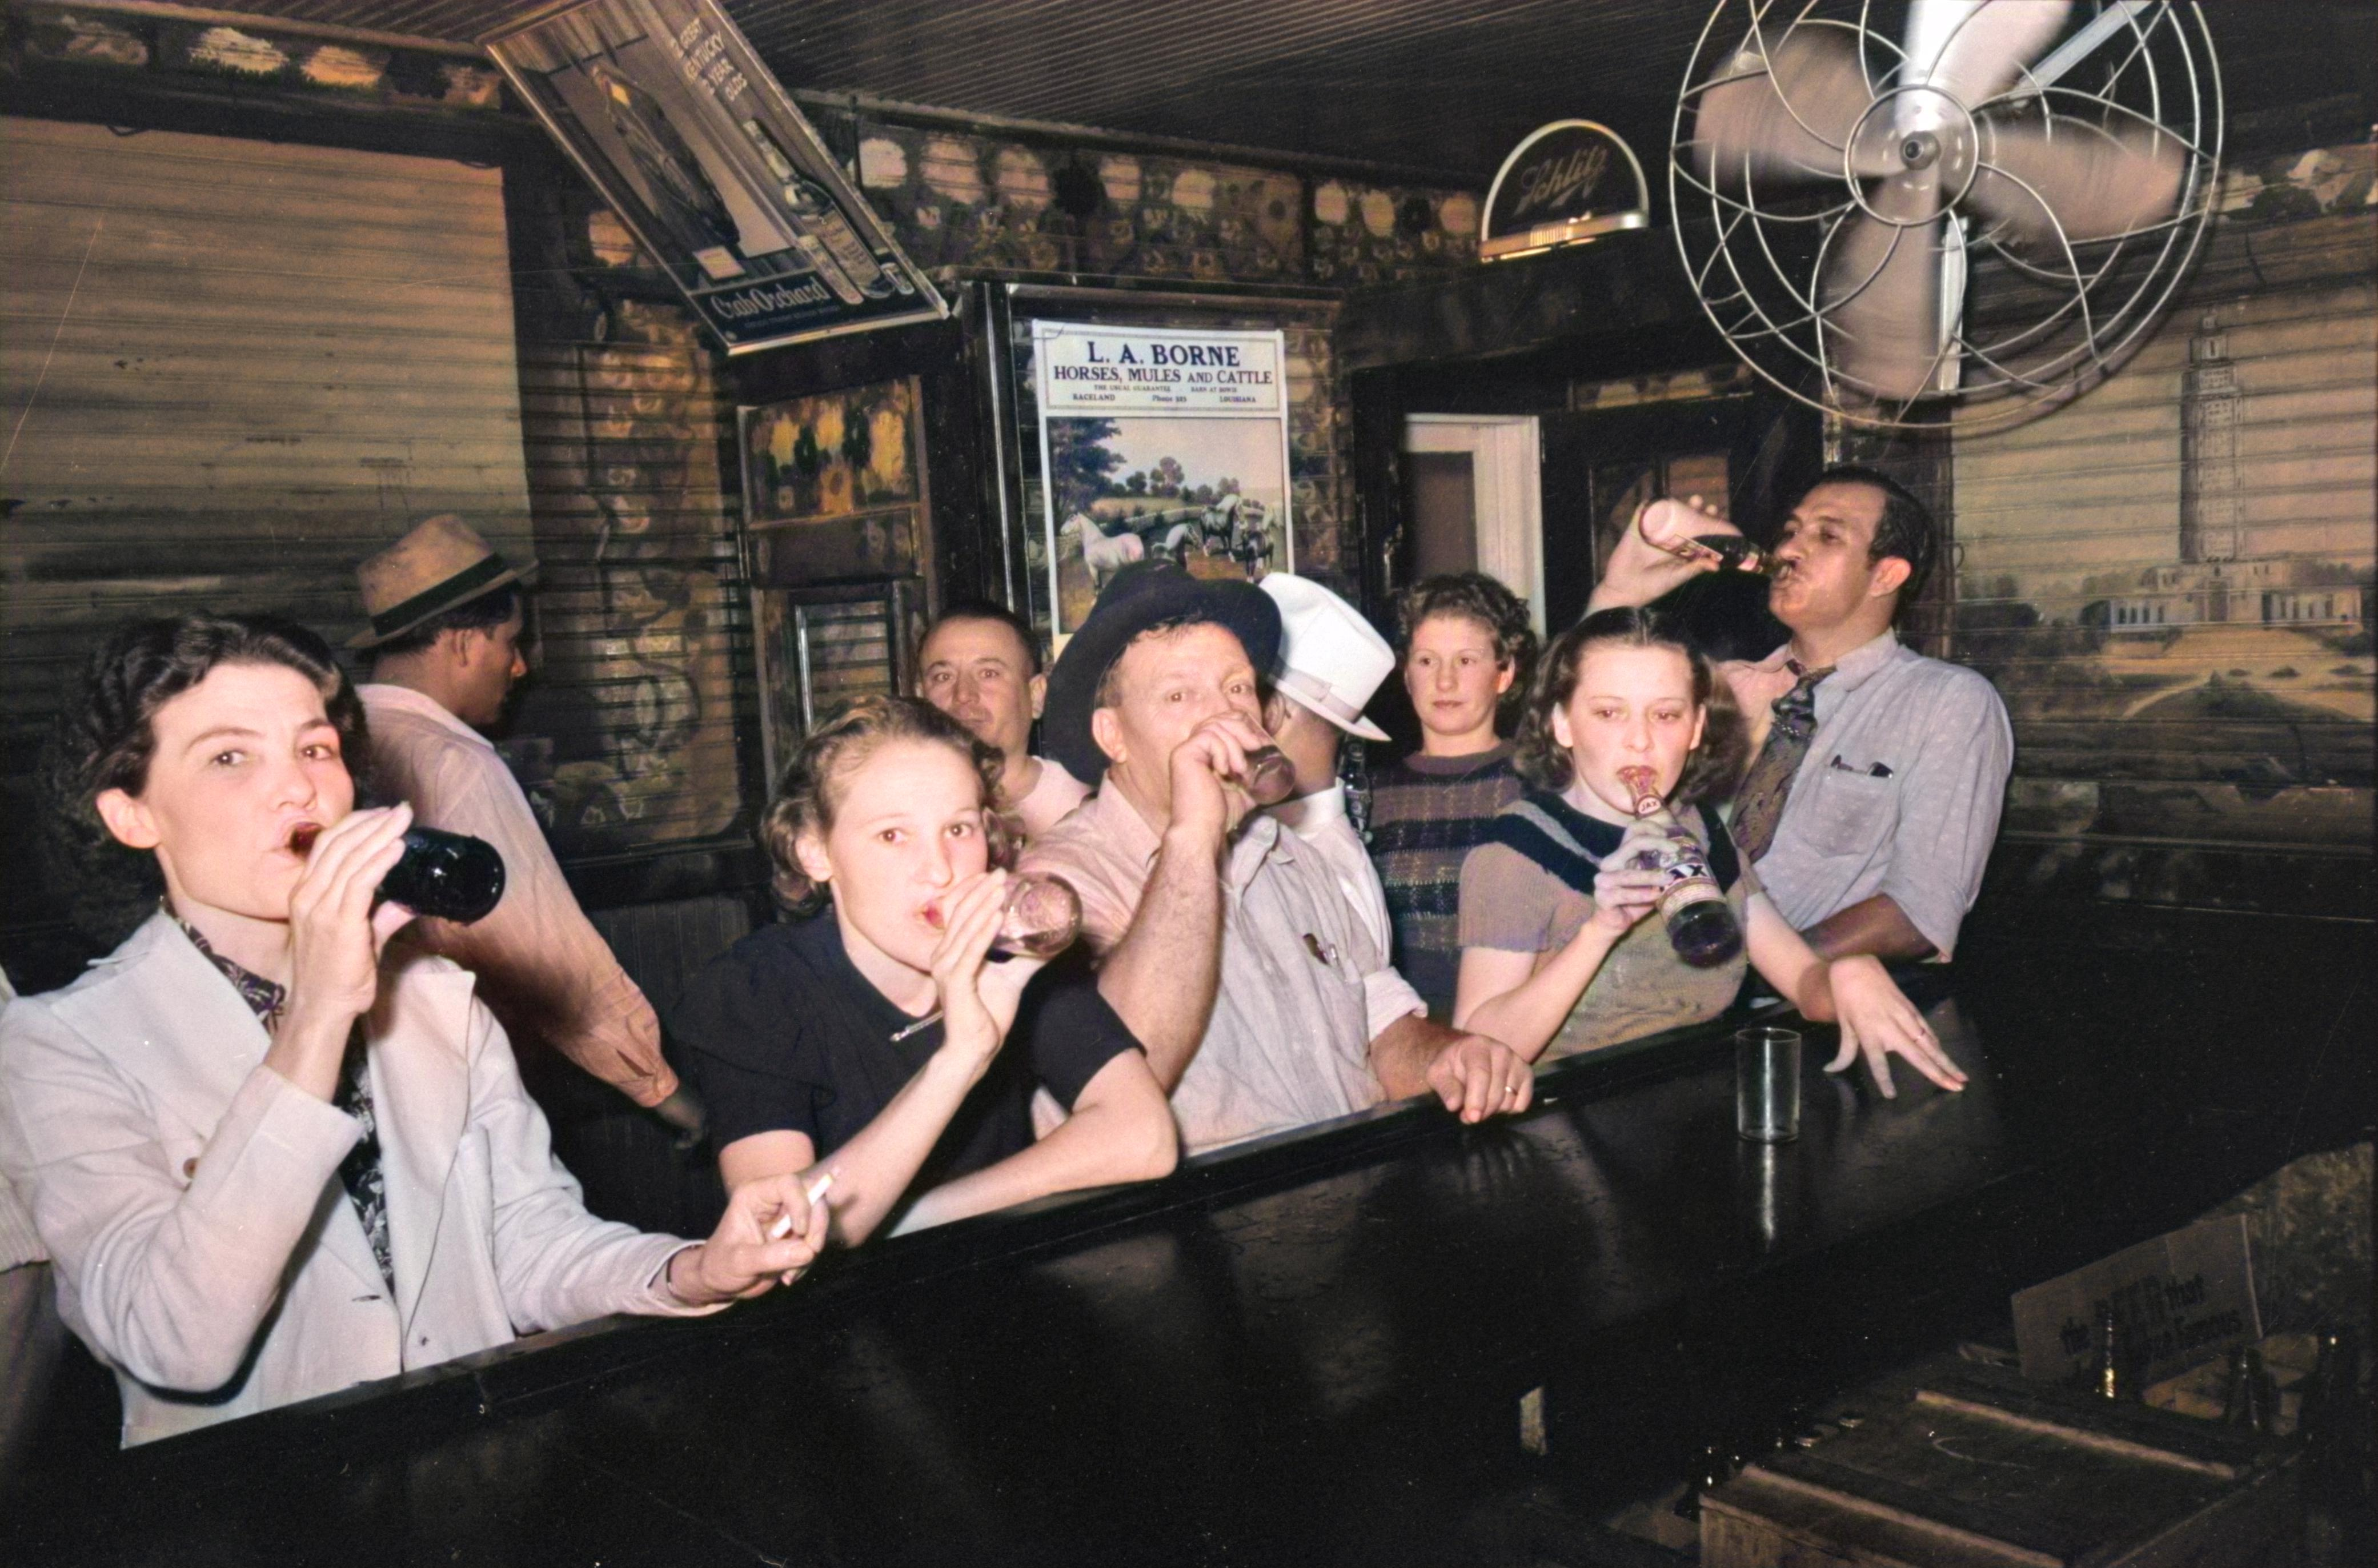

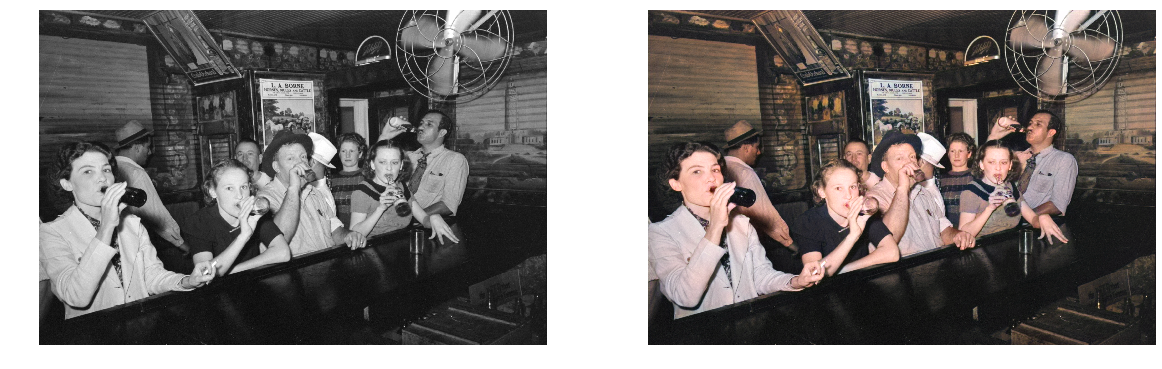

In [17]:
render_factor=35
source_url='https://upload.wikimedia.org/wikipedia/commons/e/e4/Raceland_Louisiana_Beer_Drinkers_Russell_Lee.jpg'
source_path = 'test_images/image.jpg'
result_path = None

if source_url is not None:
    result_path = colorizer.plot_transformed_image_from_url(url=source_url, path=source_path, render_factor=render_factor, compare=True)
else:
    result_path = colorizer.plot_transformed_image(path=source_path, render_factor=render_factor, compare=True)

show_image_in_notebook(result_path)

In [ ]:
#for i in range(10,46):
    #colorizer.plot_transformed_image(source_path, render_factor=i, display_render_factor=True, figsize=(10,10))

In [18]:
from imutils import build_montages
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2

In [19]:
def image_colorfulness(image):
    # split the image into its respective RGB components
    (B, G, R) = cv2.split(image.astype("float"))
    # compute rg = R - G
    rg = np.absolute(R - G)
    # compute yb = 0.5 * (R + G) - B
    yb = np.absolute(0.5 * (R + G) - B)
    # compute the mean and standard deviation of both `rg` and `yb`
    (rbMean, rbStd) = (np.mean(rg), np.std(rg))
    (ybMean, ybStd) = (np.mean(yb), np.std(yb))
    # combine the mean and standard deviations
    stdRoot = np.sqrt((rbStd ** 2) + (ybStd ** 2))
    meanRoot = np.sqrt((rbMean ** 2) + (ybMean ** 2))
    # derive the "colorfulness" metric and return it
    return stdRoot + (0.3 * meanRoot)

In [25]:
img1 = cv2.imread('/Users/adeka/Desktop/DeOldify/result_images/1.jpeg')
img2 = cv2.imread('/Users/adeka/Desktop/DeOldify/result_images/2.jpeg')

In [26]:
image_colorfulness(img1)

26.485346216473044

In [27]:
image_colorfulness(img2)

26.798948958773874